In [5]:
import itertools
import copy

Lhead =[]
Lmail =[]
Larm  =[]
Lhip  =[]
Lfoot =[]
Lgst  =[]

#file = open(r'C:\Users\kyle\Desktop\MSS\MHWstone.txt','r')
file = open(r'..\MSS\MHWstone.txt','r')
MHWS=[]

MHWs = file.readlines()
for ttt in range(1,len(MHWs)):
    MHWS.append(MHWs[ttt][0:-1].split(','))

#file = open(r'C:\Users\kyle\Desktop\MSS\MHWskmax.txt','r')
file = open(r'..\MSS\MHWskmax.txt','r')
MHWSK=[]

MHWsk = file.readlines()
for ttt in range(0,len(MHWsk)):
    MHWSK.append(MHWsk[ttt][0:-1].split(','))

#file = open(r'C:\Users\kyle\Desktop\MSS\MHW.txt','r')
file = open(r'..\MSS\MHW.txt','r')

lMHW = file.readlines()

LMHW=[]
for sss in range(len(lMHW)):
    LMHW.append(lMHW[sss][0:-1].split(','))

# a=3 b=2 c=1 n=0

for sss in range(len(LMHW)):
    try :
        if len(LMHW[sss][0])!=1:
            sentou=LMHW[sss][0]
            while len(LMHW[sss+1][0])==1:
                LMHW[sss+1].insert(0,sentou)
    except:
        continue

#ファイル容量の都合上属性防御を削除
for sss in range(len(LMHW)):
    LMHW[sss].pop(2)
    del LMHW[sss][8:14]
    LMHW[sss] = list(filter(lambda str:str != '', LMHW[sss]))
    LMHW[sss] = list(filter(lambda str:str != 'n', LMHW[sss]))

#長さ0or１のリストを削除
Ldummy=[]
for sss in range(len(LMHW)):
    if len(LMHW[sss])==0:
        continue
    elif len(LMHW[sss])==1:
        continue
    else:
        Ldummy.append(LMHW[sss])
LMHW=Ldummy


for ttt in range(len(MHWSK)):
    kkk=[MHWSK[ttt][0].rstrip(" "),"Kyle"]
    for sss in range(len(LMHW)):
        if set(kkk) & set(LMHW[sss]) != set():
            skillnamenum=list(set(kkk) & set(LMHW[sss]))
            skillnamenum=skillnamenum[0].rstrip("")
            for rrr in range(int(LMHW[sss][LMHW[sss].index(skillnamenum)+1])):
                LMHW[sss].append(MHWSK[ttt][-1])
            del LMHW[sss][LMHW[sss].index(skillnamenum)+1],LMHW[sss][LMHW[sss].index(skillnamenum)]

#上位　石　の番号を記憶
#print(LMHW)
for uuu in range(len(LMHW)):
    if set(["上位","K"]) & set(LMHW[uuu]) != set():
        jyouicount=uuu
        break

# a=3 b=2 c=1 n=0

#スキル番号でLMHWから捜索
def searchskill(Lbougu,skillnumber):
    LLL=[]
    kkk=[str(skillnumber),"Kyle"]
    for sss in range(len(Lbougu)):
        if set(kkk) & set(Lbougu[sss]) != set():
            LLL.append(Lbougu[sss])
    if len(LLL)==0:
        LLL.append(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''])
    return LLL

#11111111111111111111111111111111111111111111111111111入力1111111111111111111111111111111111111111111111111111111111111111111

print("防具だけでスキル上限値を突破するのが出ないのは仕様")
print("防具で発動する系のスキルは非対応")
print("入力したスキルを持たないものは出てこない仕様")
#print("下の方ほどいい解")
#print("装飾品のみでスキル発動も出ない（はず？）")

print("\n")

iii=input("下位の防具を検索結果から排除しますか？(y/n)")
if iii =="y":
    LMHW=LMHW[jyouicount:-1]
    print("排除しました")
elif iii =="n":
    print("排除しませんでした")

print("\n")

ddd=input("スキル合計値の0を含めますか？(最大値が１であるスキルが出ない可能性があります)(y/n)")
if ddd =="y":
    ddd=0
    print("含めました")
elif ddd =="n":
    ddd=1
    print("含めませんでした")

print("\n")


for yyy in range(len(MHWSK)):
    print(MHWSK[yyy][0],MHWSK[yyy][2])

count=int(input("検索したいスキル数を入力(3以上推奨、最大8)"))
Linputskill=[]
Linputskillname=[]
ppp=1
while ppp<count+1:
    x=input("スキル番号を入力してください；")
    Linputskill.append(x)
    print("スキル"+str(ppp)+"："+MHWSK[int(Linputskill[ppp-1])][0])
    Linputskillname.append(MHWSK[int(Linputskill[ppp-1])][0])
    ppp+=1
    

LLMHW=[]
for sss in range(len(Linputskill)):
    LLMHW.extend(searchskill(LMHW,Linputskill[sss]))

print(LLMHW)



#11111111111111111111111111111111111111111111111111111入力11111111111111111111111111111111111111111111111111111111111111111111

# Lを受け取りスキル＋スロットでスコアリングして並べ替えて返す

def SKsum_and_slotSCORE(Linputskill,L):
    Lskillslotcountsum=[]
    for ttt in range(len(L)):
        xxx=0
        yyy=0
        zzz=0
        xyz=0
        Lskillcountsum2=[]
        for sss in range(len(Linputskill)):
            skillcount=0
            for rrr in range(len(L[ttt])):
                kkk=set([str(Linputskill[sss]),"Kyle"])
                lll=set([str(L[ttt][rrr]),"Katarn"])
                if kkk & lll != set():
                    skillcount+=1
            Lskillcountsum2.append(skillcount)
    #ここからスロットの処理
        xxx+=L[ttt].count("a")
        yyy+=L[ttt].count("b")
        zzz+=L[ttt].count("c")
        xyz=xxx*3+yyy*2+zzz*1
        Lskillslotcountsum.append([ttt,sum(Lskillcountsum2)+xyz])

    Lskillslotcountsum=sorted(Lskillslotcountsum,key=lambda x: x[1],reverse=True)
    
    L2=[]
    
    for sss in range(len(L)):
        L2.append(L[Lskillslotcountsum[sss][0]])
    return L2

LLMHW=SKsum_and_slotSCORE(Linputskill,LLMHW)

#print(len(LLMHW))

#リストから同じ要素を削除
def get_unique_list(seq):
    seen = []
    return [x for x in seq if x not in seen and not seen.append(x)]
LLMHW=get_unique_list(LLMHW)



for sss in range(len(LLMHW)):
    if "頭" in LLMHW[sss]:
        if len(Lhead)<=10:
            Lhead.append(LLMHW[sss])
    elif "胴" in LLMHW[sss]: 
        if len(Lmail)<=10:
            Lmail.append(LLMHW[sss])
    elif "腕" in LLMHW[sss]:
        if len(Larm)<=10:
            Larm.append(LLMHW[sss])
    elif "腰" in LLMHW[sss]: 
        if len(Lhip)<=10:
            Lhip.append(LLMHW[sss])
    elif "脚" in LLMHW[sss]:
        if len(Lfoot)<=10:
            Lfoot.append(LLMHW[sss])
    elif "石" in LLMHW[sss]:
        if len(Lgst)<=10:
            Lgst.append(LLMHW[sss])


_a1=Lhead
_a2=Lmail
_a3=Larm
_a4=Lhip
_a5=Lfoot
_a6=Lgst

MHWSKMAXall=[]
for _x,_y,_z,_v,_w,_l in itertools.product(_a1,_a2,_a3,_a4,_a5,_a6):
    MHWSKMAXall.append([_x,_y,_z,_v,_w,_l])




print(str(len(MHWSKMAXall))+"通りの組み合わせが予想されます(MAX120000前後)")

# Lは6個一組を指定、その五個の中にどれだけスキルがあるか

def SKSUMfivesum(Linputskill,L):
    Lskillcountsum=[]
    for sss in range(len(Linputskill)):
        Lskillcount=[]
        for ttt in range(6):
            for rrr in range(len(L[ttt])):
                kkk=set([str(Linputskill[sss]),"Kyle"])
                lll=set([str(L[ttt][rrr]),"Katarn"])
                if kkk & lll != set():
                    Lskillcount.append(list(kkk&lll))
        Lskillcountsum.append(len(Lskillcount))
    
    return Lskillcountsum

#スロット版

def SKSUMfiveslot(Linputskill,L):
    xxx=0
    yyy=0
    zzz=0
    xyz=0
    Lslotcountsum=[]
    for ttt in range(5):
        xxx+=L[ttt].count("a")
        yyy+=L[ttt].count("b")
        zzz+=L[ttt].count("c")
    xyz=xxx*3+yyy*2+zzz*1
    
    for sss in range(len(Linputskill)):
        Lskillcount=[]
        for ttt in range(6):
            for rrr in range(len(L[ttt])):
                kkk=set([str(Linputskill[sss]),"Kyle"])
                lll=set([str(L[ttt][rrr]),"Katarn"])
                if kkk & lll != set():
                    Lskillcount.append(list(kkk&lll))
    
#    Lslotcountsum.append("■スコア:"+str(xyz+len(Lskillcount)))
    Lslotcountsum.append(xyz+len(Lskillcount))

    return Lslotcountsum



#or xxx in range(len(MHWSKMAXall)):
#    print(SKSUMfivesum(Linputskill,MHWSKMAXall[xxx]))
#   print(SKSUMfiveslot(MHWSKMAXall[xxx]))

#スキルを総計し最大でない可能性を排除

def SKLIMIT(Linputskill,L):
    nnn=-999999999999999999999
    Lskmaxlimitedindex=[]
    Lskmaxlimitedanswer=[]
    for sss in range(len(L)):
        TorF=[]
        for ttt in range(len(Linputskill)):
            if ddd <= SKSUMfivesum(Linputskill,L[sss])[ttt]<=int(MHWSK[int(Linputskill[ttt])][1]):
                mmm=SKSUMfivesum(Linputskill,L[sss])
                TorF.append(1)
            else:
                break
        if sum(TorF)==len(Linputskill):
            if sum(mmm)>=nnn:
                nnn=sum(mmm)
                Lskmaxlimitedindex.append(sss)
                Lskmaxlimitedanswer.append(mmm)
                print(sss,"番目に発見")
                
#1111111111111111111111111111111111111111111111111111111リミッター1111111111111111111111111111111111111111111111111111111111111111111111111
        if sss>=len(L)//2:
            break
#1111111111111111111111111111111111111111111111111111111リミッター1111111111111111111111111111111111111111111111111111111111111111111111111
    return Lskmaxlimitedindex,Lskmaxlimitedanswer
Lskmaxlimited=[]
Lskmaxlimited=SKLIMIT(Linputskill,MHWSKMAXall)

#Lskmaxlimited[0]のindexを参照しSKSUMfiveslot
Lscore=[]
for sss in Lskmaxlimited[0]:
    Lscore.append(SKSUMfiveslot(Linputskill,MHWSKMAXall[sss]))
#Lskmaxlimitedから答えを表示
Lans=[]
for sss,qqq in enumerate(Lskmaxlimited[0]):
    Lansub=[]
    for www in range(6):
        Lansub.extend([MHWSKMAXall[qqq][www][0],MHWSKMAXall[qqq][www][1]])
    for ttt in range(len(Linputskillname)):
        Lansub.append(Linputskillname[ttt]+str(Lskmaxlimited[1][sss][ttt]))
        Lscore[sss][0]+=Lskmaxlimited[1][sss][ttt]
    Lansub.append(Lscore[sss][0])
    Lans.append(Lansub)
Lans=sorted(Lans,key=lambda x:x[-1],reverse=True)
for sss in range(len(Lans)):
    Lans[sss].insert(0,"スコア"+str(Lans[sss][-1]))
    del Lans[sss][-1]
    print(" ".join(Lans[sss]))

防具だけでスキル上限値を突破するのが出ないのは仕様
防具で発動する系のスキルは非対応
入力したスキルを持たないものは出てこない仕様


下位の防具を検索結果から排除しますか？(y/n)y
排除しました


スキル合計値の0を含めますか？(最大値が１であるスキルが出ない可能性があります)(y/n)y
含めました


アイテム使用強化  0
威嚇  1
運搬の達人  2
オトモへの采配  3
ガード強化  4
ガード性能  5
回避距離UP  6
回避性能  7
回復速度  8
火事場力  9
滑走強化  10
雷属性攻撃強化  11
雷耐性  12
感知  13
貫通弾・竜の一矢強化  14
気絶耐性  15
キノコ大好き  16
強化持続  17
クライマー  18
KO術  19
研究者  20
広域化  21
攻撃  22
剛刃研磨  23
氷属性攻撃強化  24
氷耐性  25
こやし名人  26
渾身  27
昆虫標本の達人  28
採集の達人  29
逆恨み  30
散弾・剛射強化  31
死中に活  32
しゃがみ移動速度UP  33
弱点特効  34
ジャンプ鉄人  35
集中  36
瘴気環境適応  37
瘴気耐性  38
植生学  39
導蟲反応距離UP  40
心眼/弾道強化  41
睡眠属性強化  42
睡眠耐性  43
睡眠ビン追加  44
スタミナ急速回復  45
スタミナ奪取  46
スリンガー装填数UP  47
整備  48
精霊の加護  49
閃光強化  50
潜伏  51
属性解放/装填拡張  52
属性やられ耐性  53
体術  54
耐震  55
体力回復量UP 56
体力増強  57
匠  58
探索者の幸運 59
力の解放  60
地質学  61
超会心  62
挑戦者  63
追跡の達人  64
通常弾・通常矢強化  65
釣り名人  66
砥石使用高速化  67
特殊射撃強化  68
毒属性強化  69
毒耐性  70
毒ビン追加  71
飛び込み  72
泥耐性  73
肉焼き名人  74
熱ダメージ無効  75
納刀術  76
乗り名人  77
剥ぎ取り鉄人  78
破壊王 79
爆破属性強化  80
爆破ビン追加  81
爆破やられ耐性  82
抜刀術【技】  83
ハニーハンター  84
早食い  85
腹減り耐

25225 番目に発見
25228 番目に発見
25234 番目に発見
25345 番目に発見
25348 番目に発見
25354 番目に発見
25476 番目に発見
25482 番目に発見
25488 番目に発見
25491 番目に発見
25497 番目に発見
25560 番目に発見
25563 番目に発見
25569 番目に発見
25596 番目に発見
25602 番目に発見
25608 番目に発見
25611 番目に発見
25617 番目に発見
25705 番目に発見
25708 番目に発見
25714 番目に発見
25825 番目に発見
25828 番目に発見
25834 番目に発見
25945 番目に発見
25948 番目に発見
25954 番目に発見
26065 番目に発見
26068 番目に発見
26074 番目に発見
26185 番目に発見
26188 番目に発見
26194 番目に発見
26305 番目に発見
26308 番目に発見
26314 番目に発見
26436 番目に発見
26442 番目に発見
26448 番目に発見
26451 番目に発見
26457 番目に発見
26520 番目に発見
26523 番目に発見
26529 番目に発見
26556 番目に発見
26562 番目に発見
26568 番目に発見
26571 番目に発見
26577 番目に発見
26676 番目に発見
26682 番目に発見
26688 番目に発見
26691 番目に発見
26697 番目に発見
26760 番目に発見
26763 番目に発見
26769 番目に発見
26796 番目に発見
26802 番目に発見
26808 番目に発見
26811 番目に発見
26817 番目に発見
67237 番目に発見
67243 番目に発見
67249 番目に発見
67252 番目に発見
67258 番目に発見
67321 番目に発見
67324 番目に発見
67330 番目に発見
67357 番目に発見
67363 番目に発見
67369 番目に発見
67372 番目に発見
67378 番目に発見
67500 番目に発見
67506 番目に発見
67572 番目に発見
67578 番目に発見
67620 番目に発見
67626 番目に発見
67717 番目に発見
6772

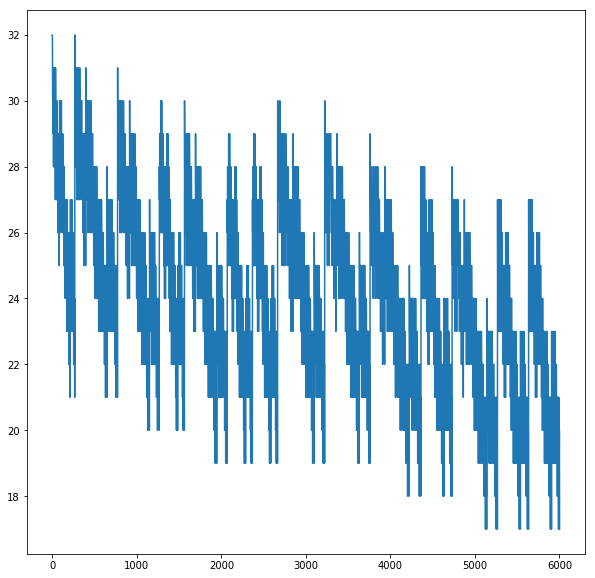

In [50]:
%matplotlib inline


import numpy as np

import matplotlib.pyplot as plt # pltとしてインポートされるのが慣例です。


x=[sss for sss in range(len(Lscore))]
y=Lscore

plt.figure(figsize=(10, 10))

plt.plot(x, y) # これでプロットをする。plotで点と点同士をなめらかにつなぐ


plt.show() # グラフの表示



